# Preliminary Analysis

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# For web scraping
import requests
from bs4 import BeautifulSoup
import seaborn as sns
# For performing regex operations
import re

# For adding delays so that we don't spam requests
import time

from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from scipy import stats
from scipy.stats import norm
import statsmodels.api as sm

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
from scipy.stats import norm #used for plotting
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler # 1. Import the scaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from numpy import unique

## NBA

In [15]:
nba = pd.read_csv('~/Downloads/allseasonsnba.csv')

In [16]:
nba.isna().sum().sum()

0

In [17]:
nba.head()

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,3069,1971.0,Zaid Abdul-Aziz,C,24.0,SEA,61.0,9.0,1276.0,16.1,...,0.739,72.0,150.0,468.0,42.0,26.0,19.0,13.9,118.0,665.0
1,3070,1971.0,Kareem Abdul-Jabbar*,C,23.0,MIL,82.0,9.0,3288.0,29.0,...,0.690,45.0,118.0,1311.0,272.0,33.0,13.0,12.5,264.0,2596.0
2,3071,1971.0,Don Adams,SF,23.0,SDR,82.0,9.0,2374.0,10.8,...,0.731,26.0,83.0,581.0,173.0,36.0,7.0,12.7,344.0,937.0
3,3072,1971.0,Rick Adelman,PG,24.0,POR,81.0,10.0,2303.0,13.4,...,0.724,76.0,154.0,282.0,380.0,19.0,32.0,15.3,214.0,1023.0
4,3073,1971.0,Lucius Allen,PG,23.0,MIL,61.0,10.0,1162.0,12.2,...,0.700,72.0,150.0,152.0,161.0,26.0,19.0,13.9,108.0,433.0


In [18]:
nba_numeric = nba.loc[:,'G':]
nba_numeric

,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,61.0,9.0,1276.0,16.1,0.489,0.0020,0.315,8.8,18.0,16.8,...,0.739,72.0,150.0,468.0,42.0,26.0,19.0,13.9,118.0,665.0
1,82.0,9.0,3288.0,29.0,0.606,0.0020,0.370,5.4,12.5,18.9,...,0.690,45.0,118.0,1311.0,272.0,33.0,13.0,12.5,264.0,2596.0
2,82.0,9.0,2374.0,10.8,0.446,0.1520,0.222,3.1,9.0,10.7,...,0.731,26.0,83.0,581.0,173.0,36.0,7.0,12.7,344.0,937.0
3,81.0,10.0,2303.0,13.4,0.484,0.2285,0.412,9.6,19.5,5.3,...,0.724,76.0,154.0,282.0,380.0,19.0,32.0,15.3,214.0,1023.0
4,61.0,10.0,1162.0,12.2,0.485,0.2285,0.276,8.8,18.0,6.2,...,0.700,72.0,150.0,152.0,161.0,26.0,19.0,13.9,108.0,433.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21429,62.0,58.0,1725.0,16.7,0.604,0.0020,0.442,8.6,17.3,12.9,...,0.679,135.0,270.0,405.0,99.0,62.0,58.0,65.0,189.0,639.0
21430,51.0,5.0,525.0,13.0,0.508,0.0060,0.247,9.2,17.0,13.2,...,0.564,43.0,81.0,124.0,42.0,7.0,21.0,20.0,61.0,178.0
21431,19.0,0.0,108.0,7.3,0.346,0.0000,0.161,10.8,24.9,17.6,...,0.600,11.0,24.0,35.0,4.0,2.0,5.0,3.0,17.0,23.0
21432,44.0,18.0,843.0,6.9,0.503,0.4480,0.181,1.9,14.2,8.0,...,0.775,15.0,110.0,125.0,36.0,15.0,16.0,40.0,78.0,240.0


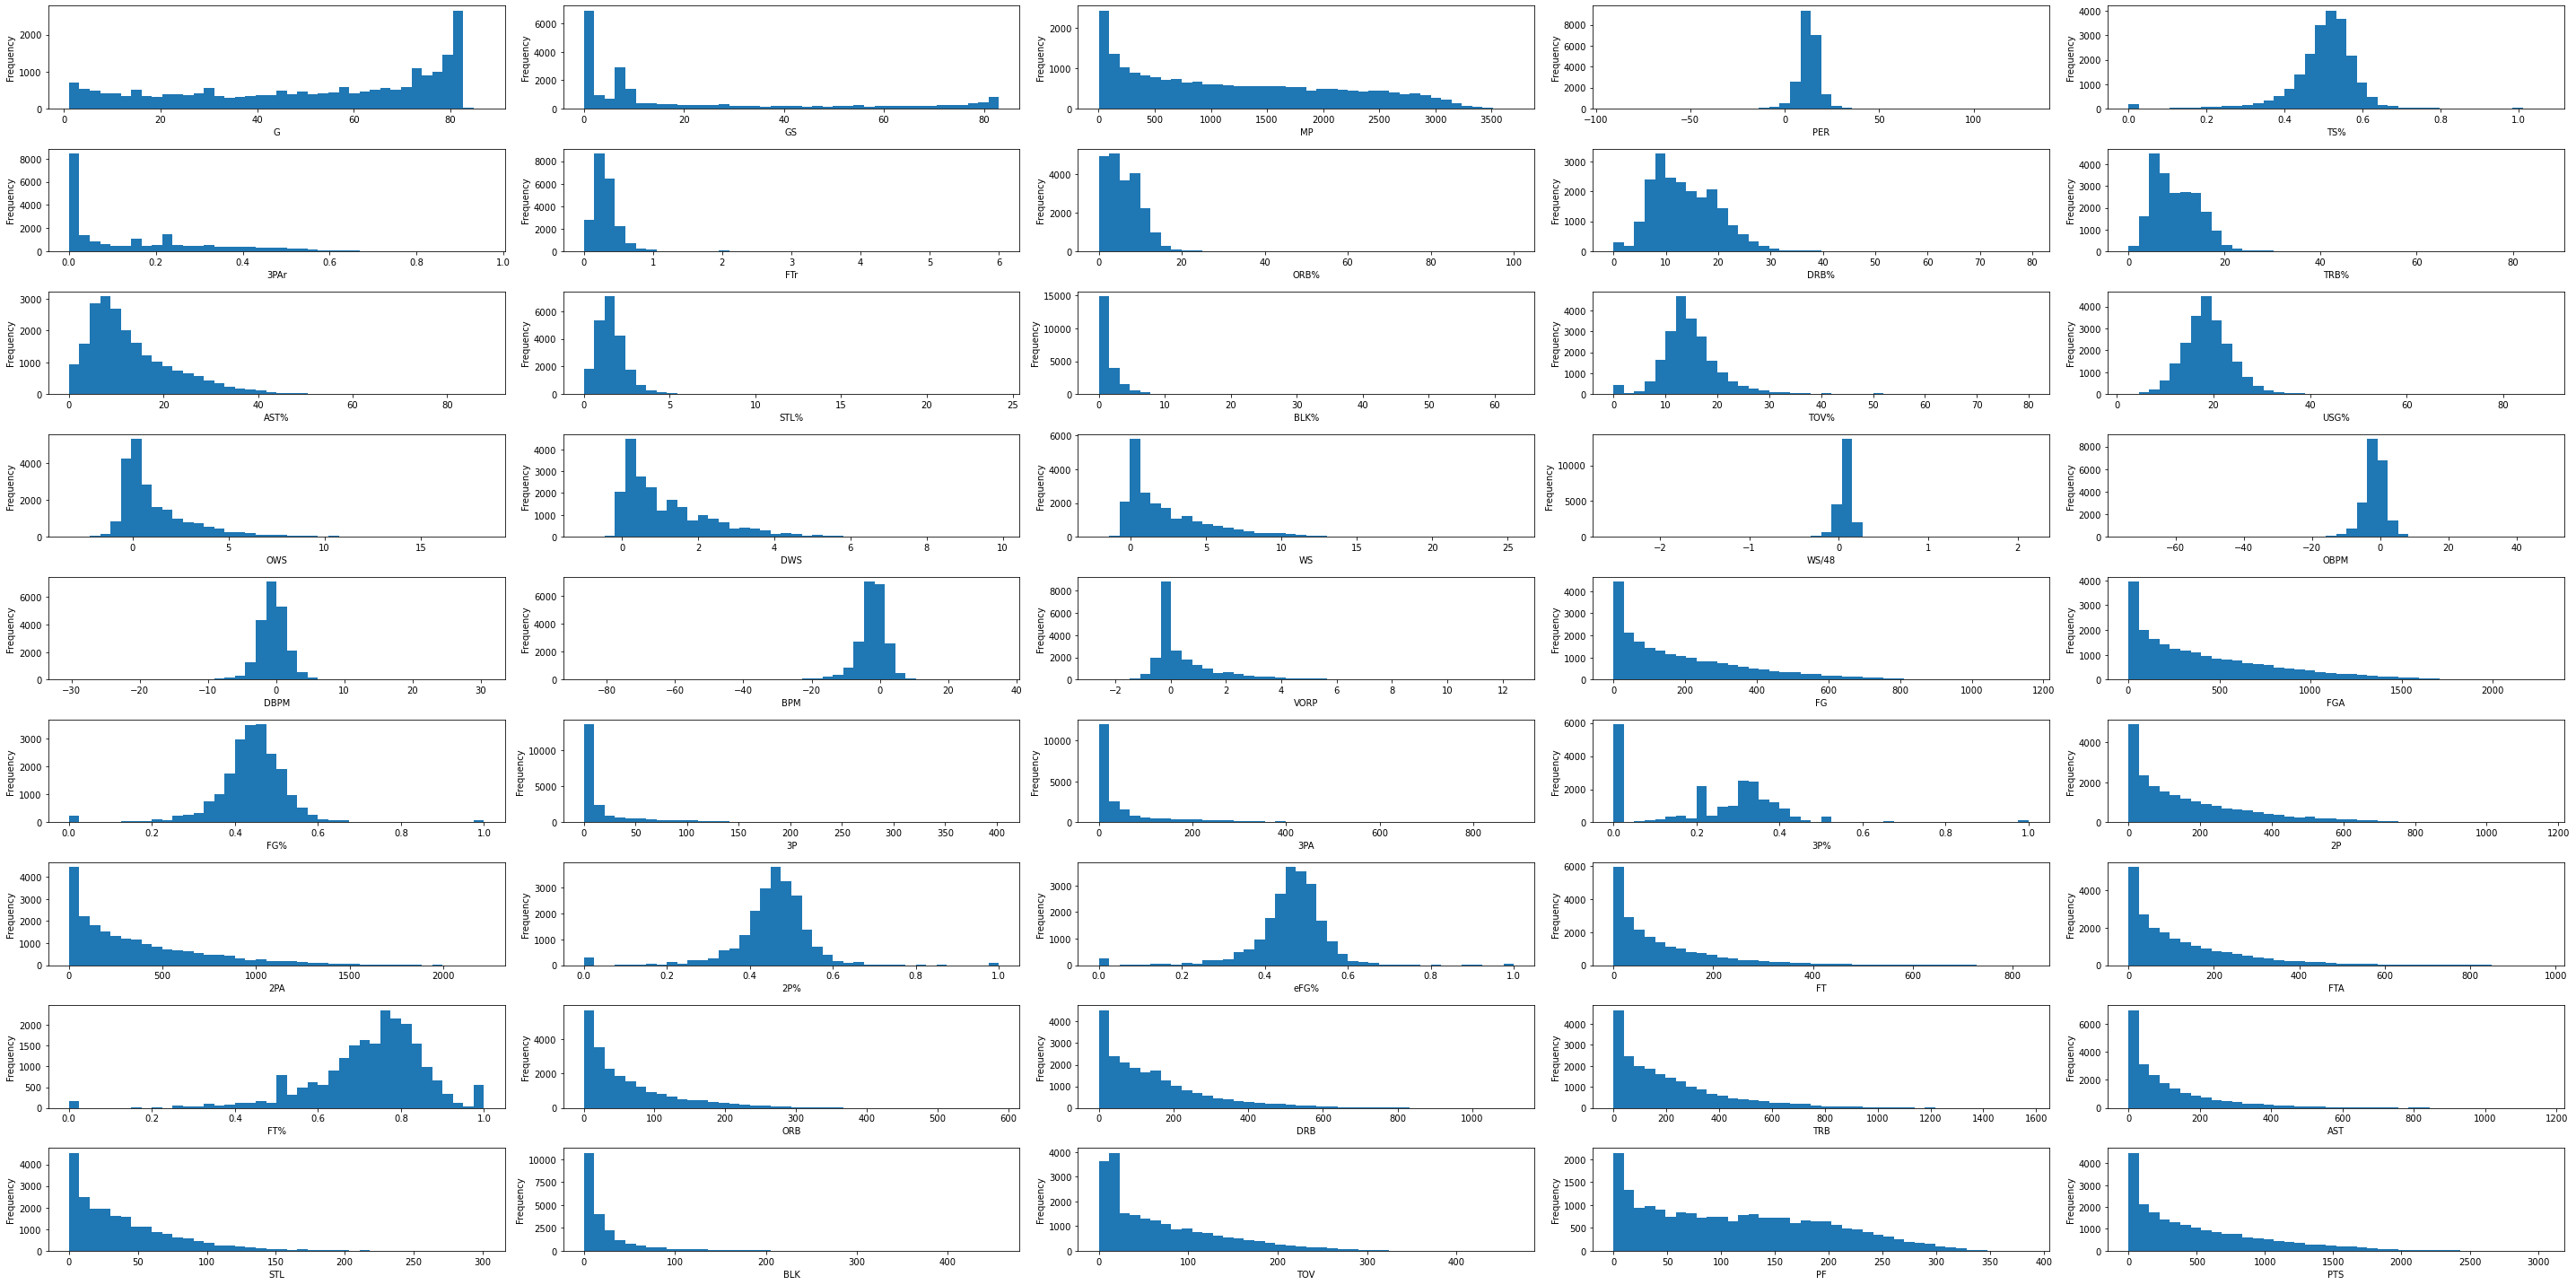

In [19]:
plt.subplots(3,4,figsize=(40,20))

for idx, col_name in enumerate(nba_numeric,1):
    plt.subplot(9,5,idx)
    nba[col_name].plot(kind='hist',bins=40)
    #clean_marketing_data[col_name].plot(kind='boxplot',bins=50)
    plt.xlabel(col_name)

plt.tight_layout()
#plt.suptitle('Numeric col freq')
plt.show()

In [20]:
nba.columns

Index(['Unnamed: 0', 'Year', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP',
       'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%',
       'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM',
       'BPM', 'VORP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA',
       '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

- `G`: left skewed
- `GS`: right skewed
- `MP`: right skewed
- `PER`: normally distributed around 10 which is around the league average
- `TS%`: normally distributed around 0.5-0.55 
- `3PAr`: right skewed
- `FTr`: normally distributed around 0.2
- `ORB%`: right skewed
- `DRB%`: doesn't look right skewed, slightly uniform
- `TRB%`: doesn't look right skewed, slightly uniform
- `AST%`: right skewed
- `STL%`: normally distributed around 2
- `BLK%`: right skewed
- `TOV%`:normally distributed around 12
- `USG%`: normally distributed around 18, (1/5 players on the floor)
- `OWS`: right skewed if not normally distributed at 0
- `DWS`: right skewed
- `WS`: right skewed
- `WS/48`: normally distributed around 0.1
- `OBPM`: normally distributed around -2
- `DBPM`: normally distributed around -2
- `BPM`: normally distributed around -2
- `VORP`: right skewed if not normally distributed around 0 
- `FG`: right skewed
- `FGA`: right skewed
- `FG%`: normally distributed around 0.45
- `3P`: right skewed
- `3PA`: right skewed
- `3P%`: uniform
- `2P`: right skewed
- `2PA`: right skewed
- `2P%`: normally distributed around 45/0.45
- `eFG%`: normally distributed around 45/0.45
- `FT`: right skewed
- `FTA`: right skewed
- `FT%`: normally distributed around 0.77 if not left skewed
- `ORB`: right skewed
- `DRB`: right skewed
- `TRB`: right skewed
- `AST`: right skewed
- `STL`: right skewed
- `BLK`: right skewed
- `TOV`: right skewed
- `PF`: right skewed, if not uniform looking
- `PTS`: right skewed

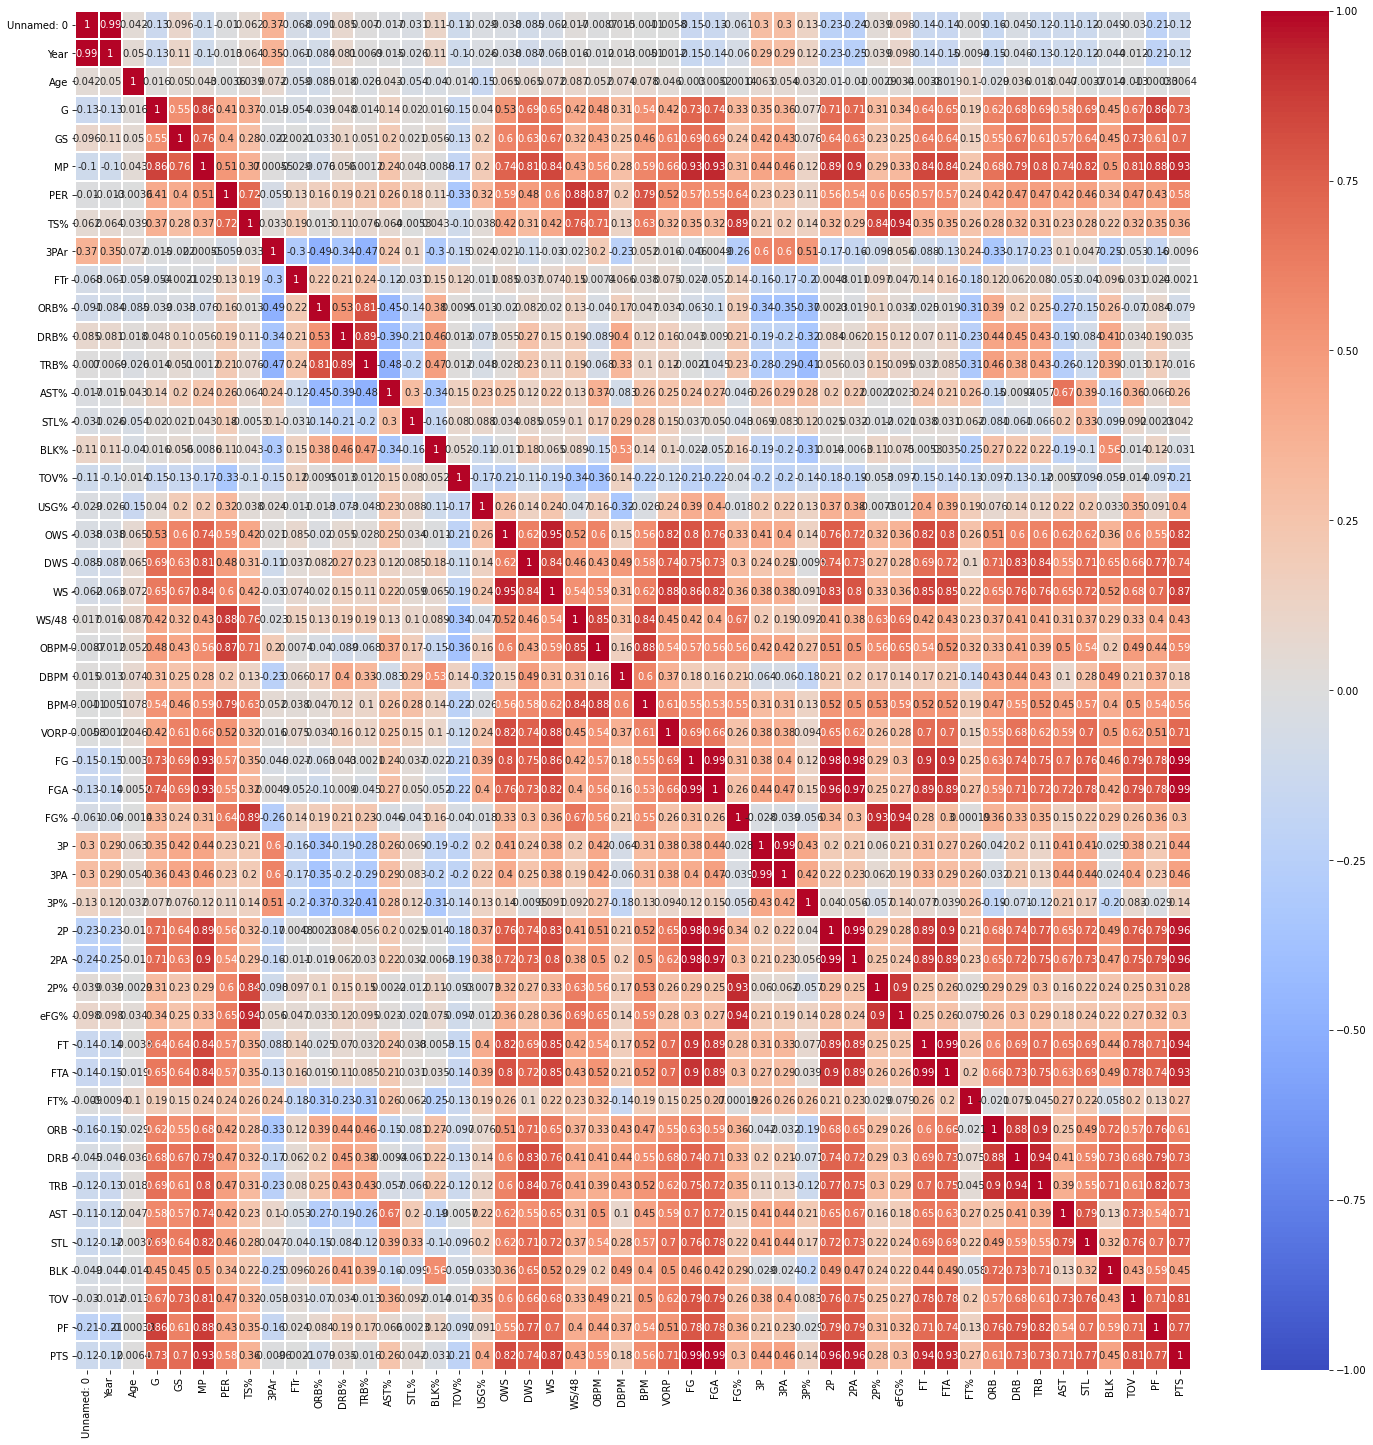

In [21]:
plt.figure(figsize=(25,25))
sns.heatmap(nba.corr(), cmap='coolwarm', vmin=-1, vmax=1, annot=True, lw=1)
plt.savefig('correlation.png')
plt.show()

so from OWS to PTS we see a mini matrix of highly correlated variables, so for further analysis, specifically clustering I will take those subset of columns to perform the model

G to TS and both to OWS has a rectangle of high correlation

More preliminary analysis is to come in the modeling as there are way to many variables in this data set that some relations aren't worth looking into unless necessary, hence modeling doing this for us.

## NCAA

In [8]:
ncaa = pd.read_csv('~/Downloads/clean_ncaa_data.csv')

In [9]:
ncaa.drop(columns='Unnamed: 0',inplace=True)

In [10]:
ncaa

,active_from,active_to,birth_date,college,height,name,position,url,weight,3PA,3P%,3P,FGA,FG%,FG,FT%,FTA,FT,G,PTS
0,1991,1995,"June 24, 1968",Duke University,6-10,Alaa Abdelnaby,F-C,/players/a/abdelal01.html,240.0,0.0,0.288,0.0,5.6,0.5990,3.30,0.7280,2.50,1.80,134.0,8.5
1,1969,1978,"April 7, 1946",Iowa State University,6-9,Zaid Abdul-Aziz,C-F,/players/a/abdulza01.html,235.0,0.1,0.222,0.0,9.7,0.5455,5.15,0.6620,4.05,2.75,93.5,13.4
2,1970,1989,"April 16, 1947","University of California, Los Angeles",7-2,Kareem Abdul-Jabbar,C,/players/a/abdulka01.html,225.0,0.0,0.250,0.0,16.8,0.6390,10.70,0.6280,7.90,5.00,88.0,26.4
3,1991,2001,"March 9, 1969",Louisiana State University,6-1,Mahmoud Abdul-Rauf,G,/players/a/abdulma02.html,162.0,7.2,0.372,2.7,21.9,0.4740,10.40,0.8630,6.40,5.50,64.0,29.0
4,1998,2003,"November 3, 1974","University of Michigan, San Jose State University",6-6,Tariq Abdul-Wahad,F,/players/a/abdulta01.html,223.0,0.9,0.333,0.3,9.6,0.5110,4.90,0.7000,3.90,2.70,107.0,13.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4236,2006,2006,"December 2, 1981",Mississippi State University,6-3,Derrick Zimmerman,G,/players/z/zimmede01.html,195.0,1.1,0.268,0.3,5.2,0.4770,2.50,0.6000,2.60,1.60,127.0,6.9
4237,2017,2017,"September 9, 1996","University of Nevada, Las Vegas",7-0,Stephen Zimmerman,C,/players/z/zimmest01.html,240.0,0.7,0.294,0.2,8.2,0.4770,3.90,0.6240,3.90,2.40,26.0,10.5
4238,1983,1983,"December 20, 1953",Kent State University,7-1,Jim Zoet,C,/players/z/zoetji01.html,240.0,0.0,0.250,0.0,2.9,0.4760,1.40,0.4290,1.00,0.40,63.0,3.2
4239,1971,1971,"June 7, 1948",Duquesne University,6-1,Bill Zopf,G,/players/z/zopfbi01.html,170.0,3.8,0.366,1.4,10.7,0.4550,4.90,0.7560,3.80,2.80,109.0,14.0


In [11]:
ncaa_numeric = ncaa.loc[:,'weight':]
ncaa_numeric

,weight,3PA,3P%,3P,FGA,FG%,FG,FT%,FTA,FT,G,PTS
0,240.0,0.0,0.288,0.0,5.6,0.5990,3.30,0.7280,2.50,1.80,134.0,8.5
1,235.0,0.1,0.222,0.0,9.7,0.5455,5.15,0.6620,4.05,2.75,93.5,13.4
2,225.0,0.0,0.250,0.0,16.8,0.6390,10.70,0.6280,7.90,5.00,88.0,26.4
3,162.0,7.2,0.372,2.7,21.9,0.4740,10.40,0.8630,6.40,5.50,64.0,29.0
4,223.0,0.9,0.333,0.3,9.6,0.5110,4.90,0.7000,3.90,2.70,107.0,13.1
...,...,...,...,...,...,...,...,...,...,...,...,...
4236,195.0,1.1,0.268,0.3,5.2,0.4770,2.50,0.6000,2.60,1.60,127.0,6.9
4237,240.0,0.7,0.294,0.2,8.2,0.4770,3.90,0.6240,3.90,2.40,26.0,10.5
4238,240.0,0.0,0.250,0.0,2.9,0.4760,1.40,0.4290,1.00,0.40,63.0,3.2
4239,170.0,3.8,0.366,1.4,10.7,0.4550,4.90,0.7560,3.80,2.80,109.0,14.0


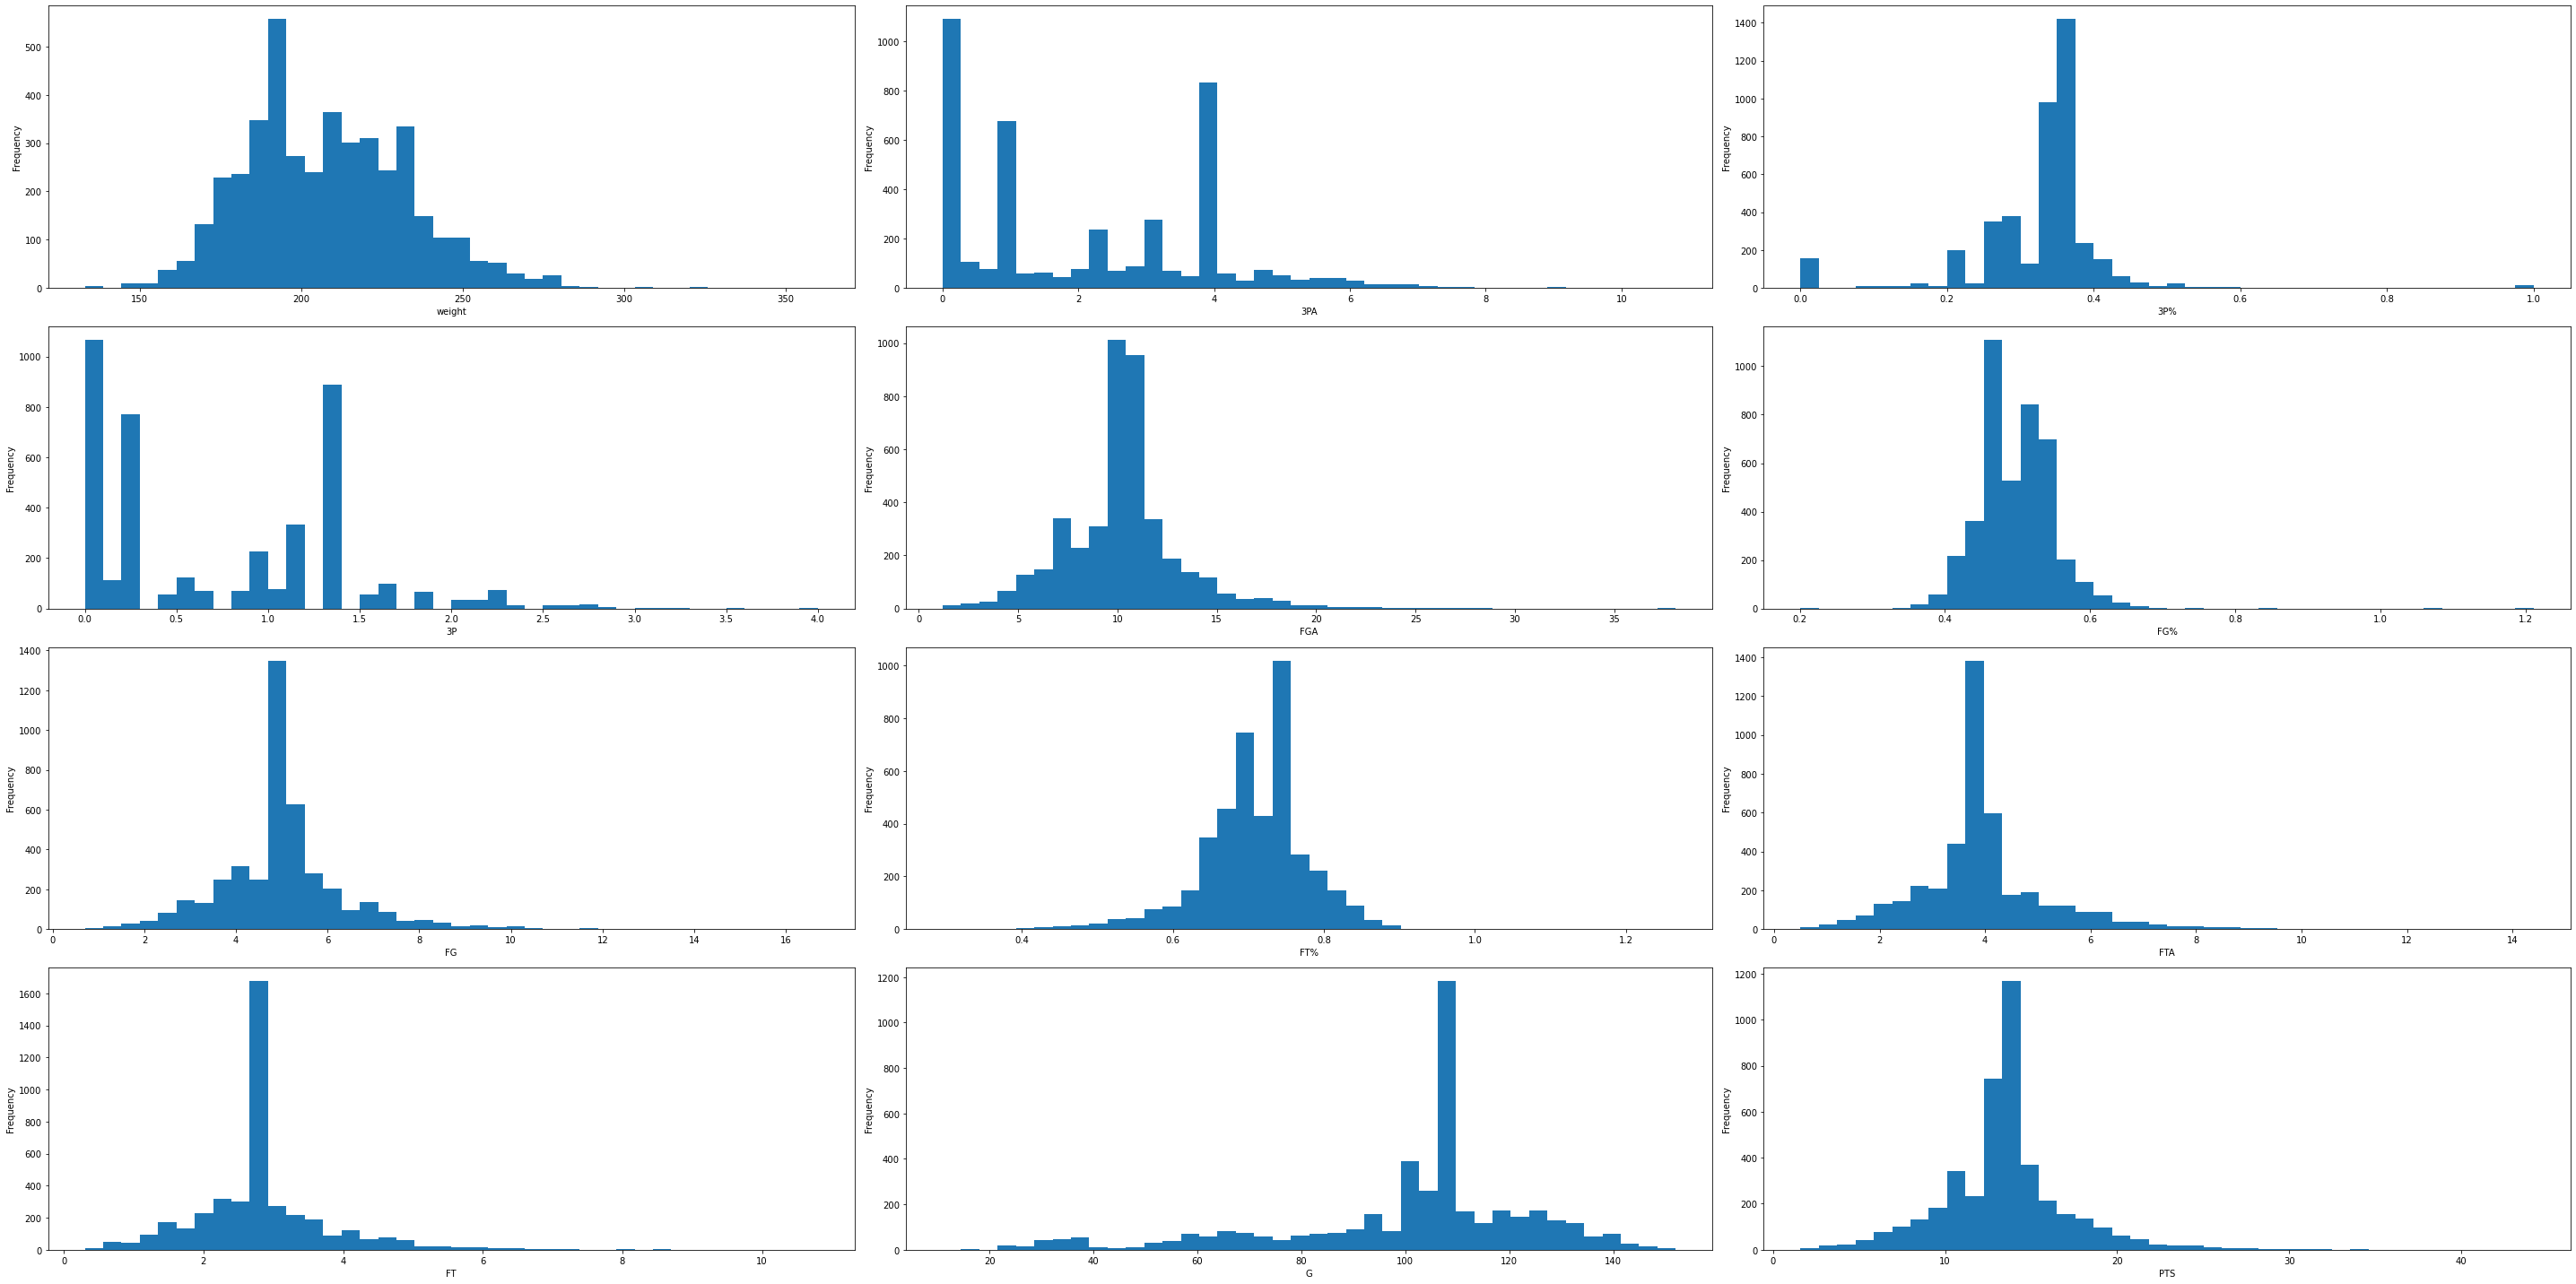

In [12]:
plt.subplots(3,4,figsize=(40,20))

for idx, col_name in enumerate(ncaa_numeric,1):
    plt.subplot(4,3,idx)
    ncaa_numeric[col_name].plot(kind='hist',bins=40)
    #clean_marketing_data[col_name].plot(kind='boxplot',bins=50)
    plt.xlabel(col_name)

plt.tight_layout()
#plt.suptitle('Numeric col freq')
plt.show()

- `weight`: for the most part this looks uniform
- `3PA`: hard to say, no apparent skewness or normality being shown, safest thing to say is it is uniformly distributed
- `3P%`: somewhat normally distrbuted around 0.35, 35%
- `3P`: different spikes, safe to say uniformly distributed if not I will leave this as unknown
- `FGA`: normally distributed around 10-12
- `FG%`: normally distributed around 0.45-0.5, 45-50%
- `FG`: normally distributed around 5
- `FT%`: normally distributed around 0.7-0.77
- `FTA`: normally distributed around 4
- `FT`: normally distributed around 3, or uniformly distributed
- `G`: normally distributed around 110, or uniformly distributed
- `PTS`: normally distributed around 15

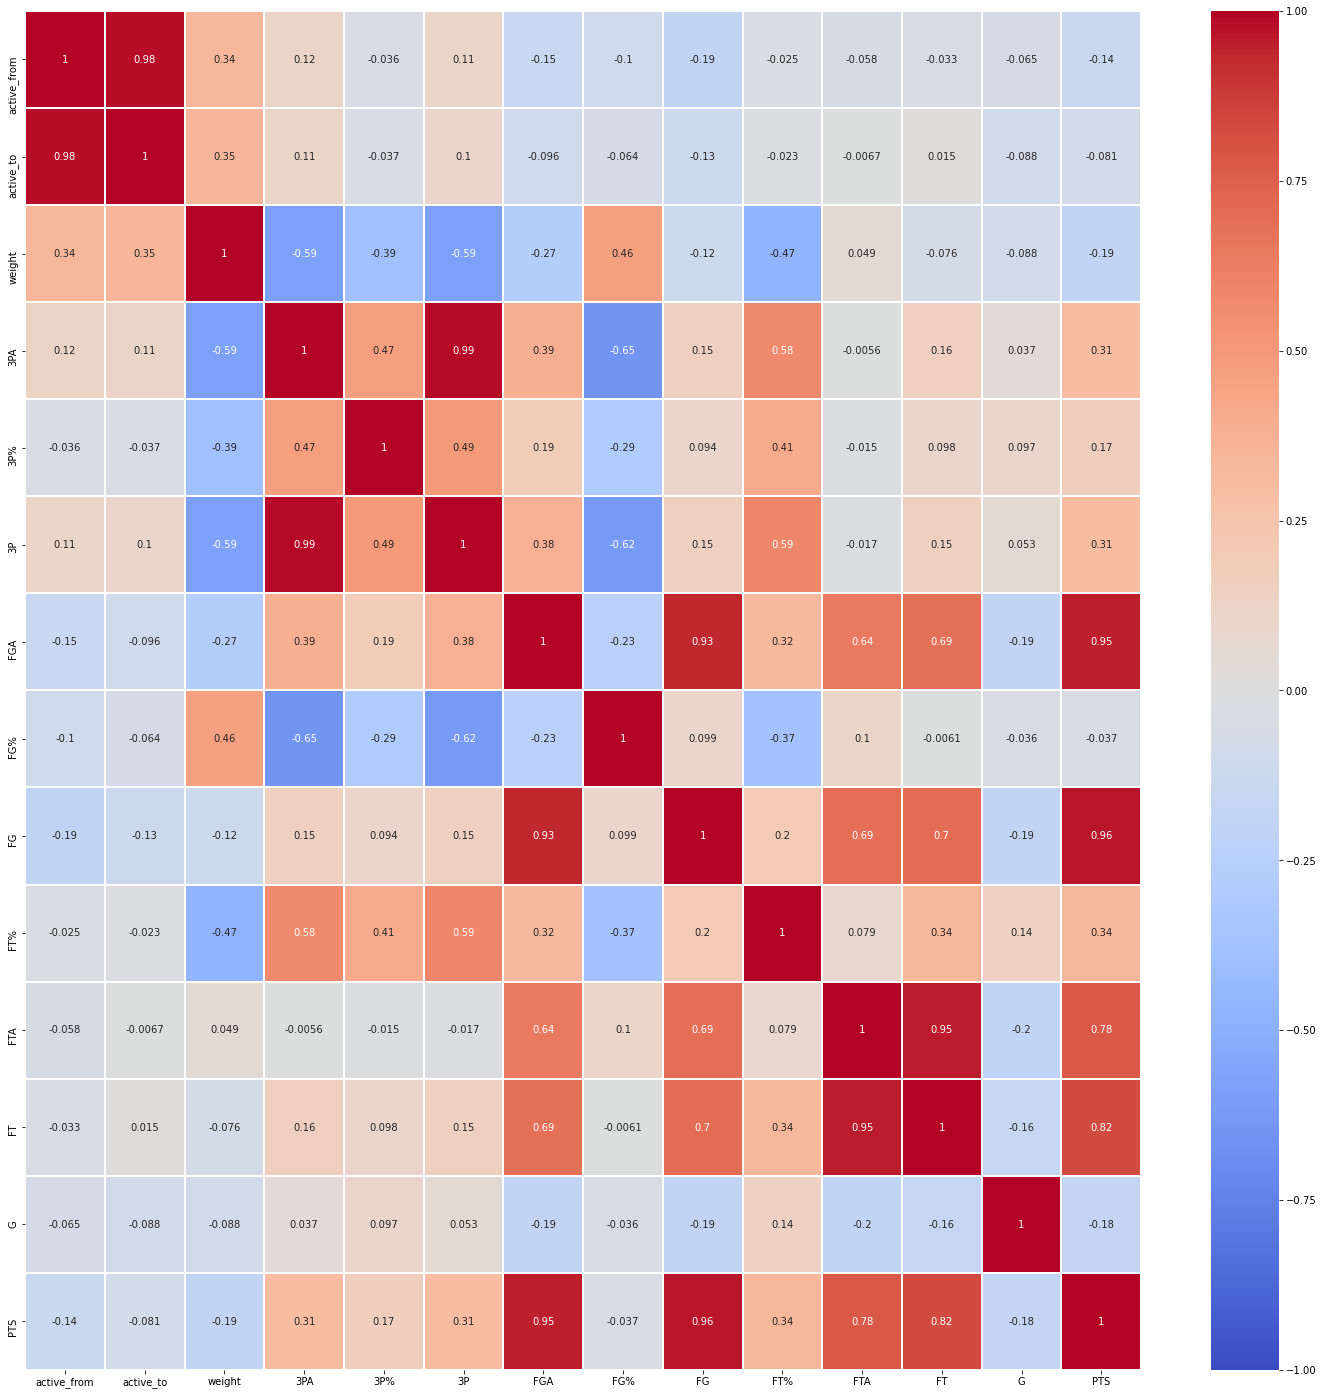

In [22]:
plt.figure(figsize=(25,25))
sns.heatmap(ncaa.corr(), cmap='coolwarm', vmin=-1, vmax=1, annot=True, lw=1)
plt.savefig('correlation.png')
plt.show()

Some important observations I have found are the following:

A lot of the high correltions are in large part due to them being in a similar category. For example, FTA and FT are direct opposites but are positively correlated as the more free throws you shoot the more you make. PTS to other made baskets like FG/FGA/FT/FTA are in part to free throws are implied in its name, they're free shots at the rim and as such NBA players have high free throw percentages increasing PTS and for FG (field goals) the more you shoot the more you score, the more points you accumalte in theory. There are some interesting correlations between free throw % and the 3P (and 2P hence FG) stat category and this could be in part to those who are good shooters can shoot 3's at a high rate and in principle free throws are easier shots for a proven shooter to score (Stephen Curry, greatest three pointer shooter ever, has a 90%+ free throw percentage). Lastly all the three point categories are all correlated with each other as these shots are more difficult so the more shots you shoot from there the more you can make, which the total scored to missed is directly impacted by the percentage you shoot from the areas. This is more apparent than for the FG category. Lastly FG% is directly impacted by weight in a positive direction, so the more you weigh the better you shoot, which is largely in part to a developed body being able to not fatigue during the game.

Note: I haven't touched on the NBA correlation matrix, and its because in the modeling section, I will be seeing which statistics determine a players draft position and as such it indirectly does the preliminary analysis in the process. I also won't be modeling except for clustering for the NCAA stats as it is very limited and all I could find in this short period of time working on this report.